Resolva o exemplo 3.5 (P 48) com o método de Euler atrasado (Backward Euler) usando método ponto fixo e método de Newton.

Estude a positividade da solução.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton # just for Newton's Method

# **Defining the provided ODE system and parameters**

In [ ]:
def f1(u1, u2, u3):
    return (-k1)*u1 + k2*u2*u3

def f2(u1, u2, u3):
    return k1*u1 - k2*u2*u3 - k3*(u2**2)

def f3(u2):
    return k3*(u2**2)

In [ ]:
k1 = 0.04
k2 = 10**4
k3 = 3*(10**7)

u1_0 = 1.0
u2_0 = 0.0
u3_0 = 0.0

# **Defining the solving methods and plotting the respective graphs**

**Backward Euler + Fix Point** - *This method only works whith step size (h) <= 1e-4*

In [ ]:
def backward_euler_fix_point(f1=f1, f2=f2, f3=f3, u1_0=u1_0, u2_0=u2_0, u3_0=u3_0, step_size=1e-4, max_time=1000, max_iter=100, tol=1e-3):
    u1 = [u1_0]
    u2 = [u2_0]
    u3 = [u3_0]
    T = [0.0]

    while T[-1] < max_time:
        u1_guess = u1[-1]
        u2_guess = u2[-1]
        u3_guess = u3[-1]

        # fix point method to find the right values for u1_n, u2_n and u3_n
        for _ in range(int(max_iter)):
            u1_new = u1_guess + step_size * f1(u1_guess, u2_guess, u3_guess)
            u2_new = u2_guess + step_size * f2(u1_guess, u2_guess, u3_guess)
            u3_new = u3_guess + step_size * f3(u2_guess)

            if abs(u1_new - u1_guess) < tol and abs(u2_new - u2_guess) < tol and abs(u3_new - u3_guess) < tol:
                break

            u1_guess = u1_new
            u2_guess = u2_new
            u3_guess = u3_new

        u1.append(u1_new)
        u2.append(u2_new)
        u3.append(u3_new)
        T.append(T[-1] + step_size)

    return u1, u2, u3

In [ ]:
h = 1e-4
max_t = 1000
max_iter = 1000
tol = 1e-3

u1, u2, u3 = backward_euler_fix_point(step_size=h, max_time=max_t, max_iter=max_iter, tol=tol)
T = np.linspace(0, max_t, len(u1))

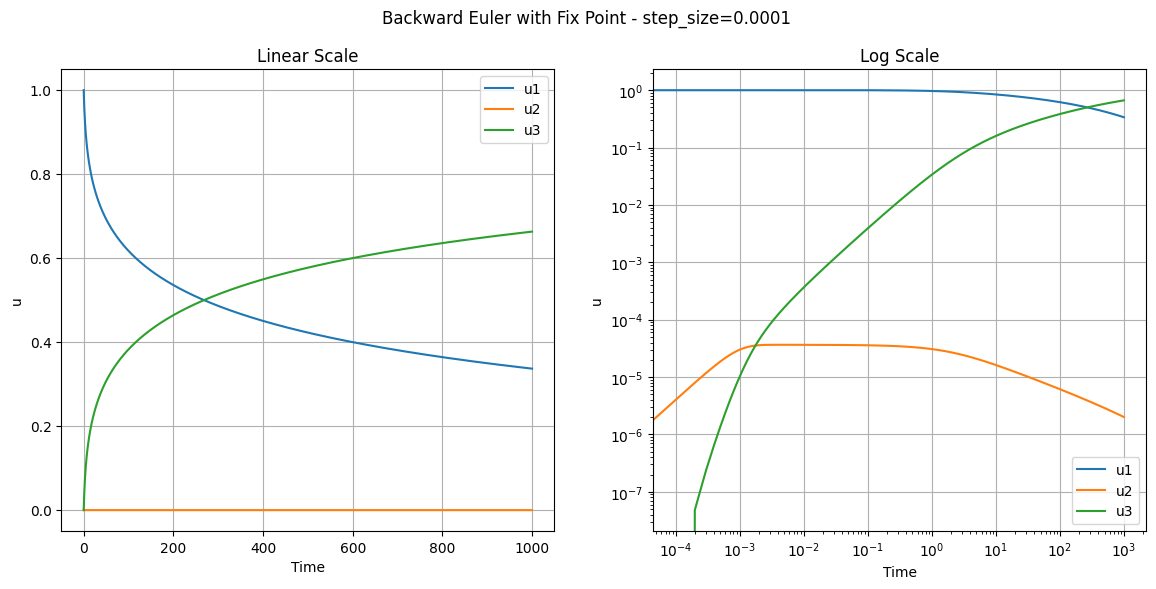

In [ ]:
### this cell takes 1min ~ 2min to run, I believe it's due to the number of points to be plotted ###

plt.figure(figsize=(14, 6))
plt.suptitle(f'Backward Euler with Fix Point - step_size={h}')

# linear scale
plt.subplot(1, 2, 1)
plt.plot(T, u1, label='u1')
plt.plot(T, u2, label='u2')
plt.plot(T, u3, label='u3')
plt.title('Linear Scale')
plt.xlabel('Time')
plt.ylabel('u')
plt.legend()
plt.grid()

# log scale
plt.subplot(1, 2, 2)
plt.loglog(T, u1, label='u1')
plt.loglog(T, u2, label='u2')
plt.loglog(T, u3, label='u3')
plt.title('Log Scale')
plt.xlabel('Time')
plt.ylabel('u')
plt.legend()
plt.grid()

**Backward Euler + Newton** - *This method takes a lot of time using very small step sizes (h), but it can accept them*

In [ ]:
def backward_euler_newton(f1=f1, f2=f2, f3=f3, u1_0=u1_0, u2_0=u2_0, u3_0=u3_0, step_size=1e-2, max_time=1000, max_iter=100, tol=1e-3):
    u1 = [u1_0]
    u2 = [u2_0]
    u3 = [u3_0]
    T = [0.0]

    while T[-1] < max_time:
        u1_n = u1[-1]
        u2_n = u2[-1]
        u3_n = u3[-1]

        # functions for Newton's method, made so that the root is our point of interest in time n
        def g1(u1_next): return u1_next - u1_n - step_size * f1(u1_next, u2_n, u3_n)
        def g2(u2_next): return u2_next - u2_n - step_size * f2(u1_n, u2_next, u3_n)
        def g3(u3_next): return u3_next - u3_n - step_size * f3(u2_n)

        # derivatives of the g functions so that Newton's method can be applied, otherwise the secant method would be applied
        def dg1(u1_next): return 1 - step_size * (-k1)
        def dg2(u2_next): return 1 - step_size * (-k2 - 2*k3*u2_next)
        def dg3(u3_next): return 1 - step_size * (0)

        u1_next = newton(g1, u1_n, dg1, maxiter=max_iter, tol=tol)
        u2_next = newton(g2, u2_n, dg2, maxiter=max_iter, tol=tol)
        u3_next = newton(g3, u3_n, dg3, maxiter=max_iter, tol=tol)

        u1.append(u1_next)
        u2.append(u2_next)
        u3.append(u3_next)
        T.append(T[-1] + step_size)

    return u1, u2, u3

In [ ]:
h = 1e-2
max_t = 1000
max_iter = 1000
tol = 1e-3

u1, u2, u3 = backward_euler_newton(step_size=h, max_time=max_t, max_iter=max_iter, tol=tol)
T = np.linspace(0, max_t, len(u1))

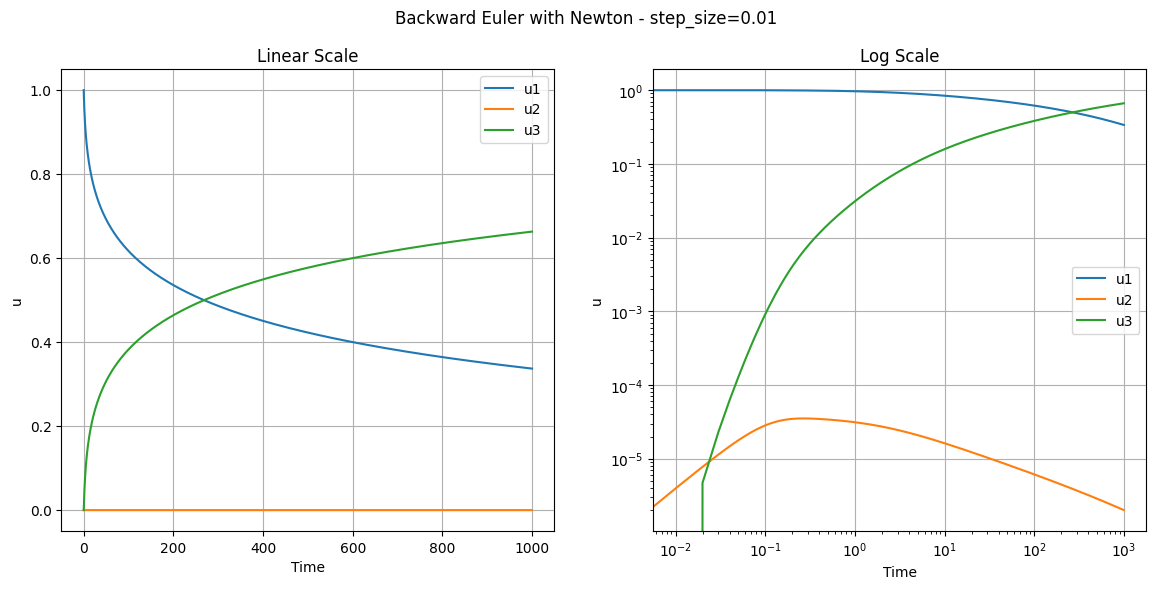

In [ ]:
plt.figure(figsize=(14, 6))
plt.suptitle(f'Backward Euler with Newton - step_size={h}')

# linear scale
plt.subplot(1, 2, 1)
plt.plot(T, u1, label='u1')
plt.plot(T, u2, label='u2')
plt.plot(T, u3, label='u3')
plt.title('Linear Scale')
plt.xlabel('Time')
plt.ylabel('u')
plt.legend()
plt.grid()

# log scale
plt.subplot(1, 2, 2)
plt.loglog(T, u1, label='u1')
plt.loglog(T, u2, label='u2')
plt.loglog(T, u3, label='u3')
plt.title('Log Scale')
plt.xlabel('Time')
plt.ylabel('u')
plt.legend()
plt.grid()

# **Analyzing the positivity of solutions**

To start, the Backward Euler method is a numerical integration method known for its stability properties, especially for stiff ODEs. It is an implicit method, which means that it inherently tends to be more stable in preserving positivity compared to explicit methods. And both Newton's method and Fix-Point can be used to solve ODEs while attempting to preserve positivity. However, the Fix-Point Method has advantages in cases where enforcing positivity is a critical concern. It can often be tailored to the problem at hand, allowing for the selection of transformation functions that inherently maintain positivity, making it a practical choice for systems where preserving positivity is paramount. Newton's method, although it can also be used, does not guarantee 100% the positiveness of the solution, as there is the possibility of converging on a negative result depending on the starting point in the iteration.

The Robertson's problem involves chemical reactions with positive rate constants k1, k2, and k3. The key point to note is that all these rate constants are positive numbers. These rate constants determine how the concentrations change over time. The reaction kinetics themselves are non-negative functions, which means that for non-negative initial concentrations, the concentrations will always remain non-negative. More formally, we can say that for any non-negative initial concentrations (u1_0, u2_0, u3_0), and for any positive rate constants (k1, k2, k3), the reaction terms in the ODEs (f1, f2, f3) are non-negative functions.

In summary, the Backward Euler method, in combination with positive rate constants and non-negative initial conditions, ensures the positivity of solutions in Robertson's problem. Positivity is essential in the real world because it reflects the physical constraints and conservation laws governing chemical and physical systems, ensuring that the results obtained from simulations are physically meaningful and interpretable.